# Linear SVM Classification

## Soft Margin Classification

* The following Scikit-Learn code loads the iris dataset and trains a linear SVM classifier to detect Iris virginica flowers. The pipeline first scales the features, then uses a LinearSVC with C=1

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==2) #iris virginica

svm_clf =make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)

svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [4]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

* The first plant is classified as an Iris virginica, while the second is not. Let’s look at the scores that the SVM used to make these predictions. These measure the signed distance between each instance and the decision boundary:

In [5]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

# Nonlinear SVM Classification

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [7]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [8]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(
        C=10,
        max_iter=10_000,
        random_state=42
    )
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

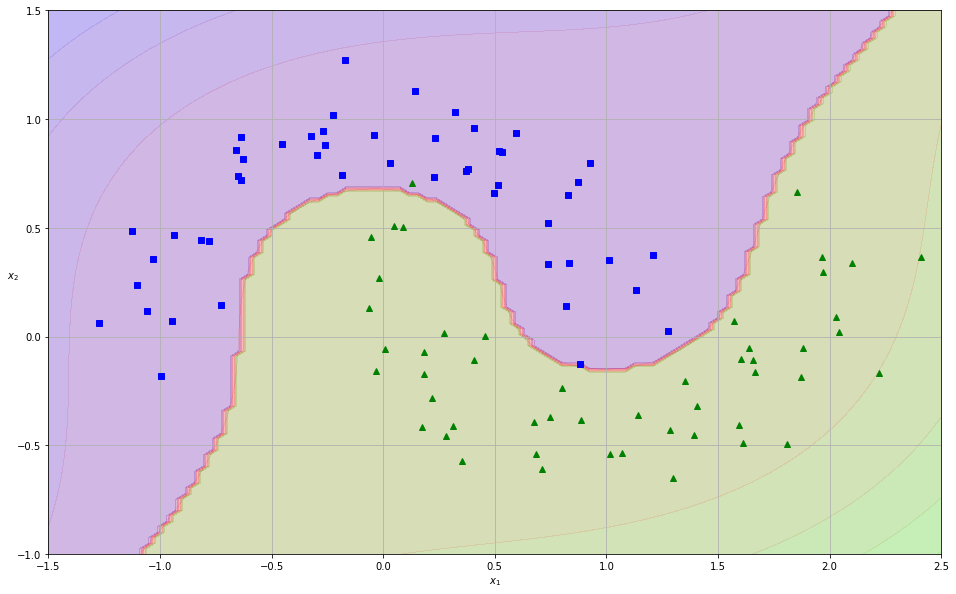

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 10))
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Polynomial Kernel

* Adding polynomial features can be insufficient for complex datasets or slow down the model when the degree is high, but the kernel trick in SVMs allows you to achieve the same result without actually adding these features, avoiding an explosion in the number of features and keeping the model efficient.

In [16]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(
        kernel="poly",
        degree=3,
        coef0=1,
        C=5
    )
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Text(0, 0.5, '')

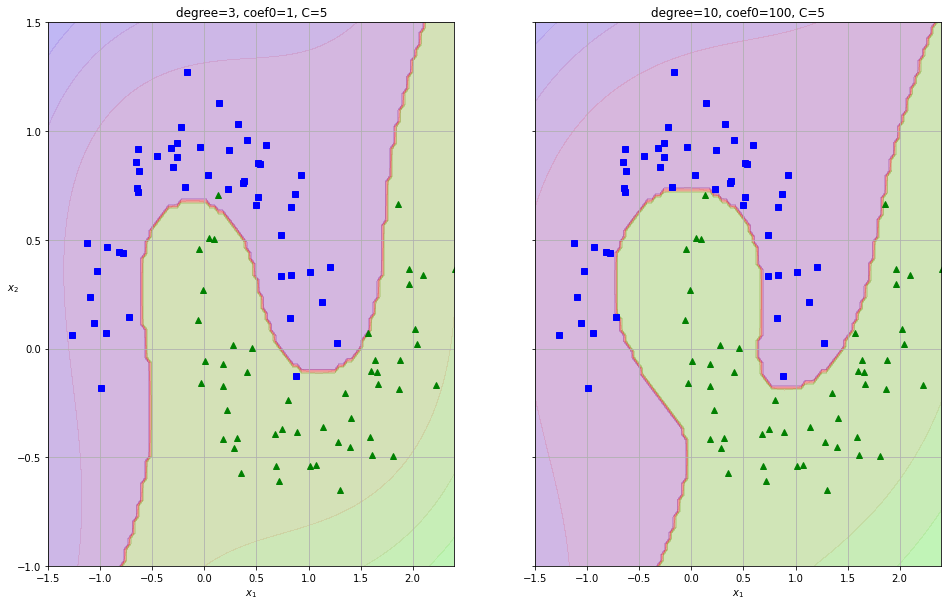

In [18]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(16, 10), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")